In [ ]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import  re
import itertools
import os
from itertools import groupby

It existed also : compare_ssim /MSE


# Test for one day video

In [ ]:
dataC = []

# sort picture
r = re.compile("(\d+)\.jpg$")
dir_sampleC = glob.glob("/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe*.jpg")
dir_sampleC = sorted(dir_sampleC,key=lambda x: int(r.search(x).group(1)))

# remove first picture
dir_sampleC[:] = [x for x in dir_sampleC if "frame0" not in x]

for path in dir_sampleC:
  
  image = cv2.imread(path)
  
  # convert the images to grayscale
  image = rgb2gray(image)
  
  # resize picture
  image = cv2.resize(image,(224,224))#VGG16/19 (224x224x3RGB)
  
  dataC.append(image)

# scale the raw pixel intensities to the range [0,1]
dataC = np.array(dataC, dtype="float") / 255.0 

In [ ]:
print(dir_sampleC)
print(len(dir_sampleC))
print(dataC[1])
print(dataC[2].shape)

['/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe30.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe60.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe90.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe120.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe150.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe180.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe210.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe240.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe270.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe300.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe330.jpg', '/content/drive/My Drive/projet_me

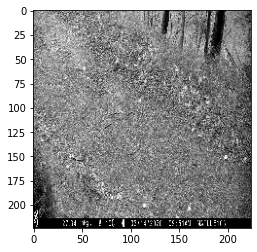

In [ ]:
# show picture
plt.imshow(dataC[58],cmap="gray")
plt.show()

In [ ]:
# calcul of absolute difference of pixel between each images(0 to 58) and the last image(59)
t3=[]

for i in range(59) :
  diff = cv2.absdiff(dataC[i],dataC[59]) 
  sdiff = np.sum(diff)
  
  t3.append(sdiff)

print(t3)

[7.139226391070946, 7.092532006924678, 6.676913996387086, 6.400867233105656, 6.429062616374046, 6.336264069603798, 6.185420974549054, 6.032384822484771, 6.092288953350544, 6.106776354483617, 6.12467895426731, 6.178023061891348, 7.125203117867054, 6.91339050773941, 6.808500655622178, 6.812886108708233, 6.717250798125569, 6.655247464896147, 6.57115511857817, 6.326218071447428, 6.093532097476453, 5.99710763422933, 5.987891028797592, 5.93763980230269, 5.790582014998053, 5.771718705926143, 5.666077830206898, 5.731407085638052, 5.7898308407013275, 5.6398079697564, 5.48555113002884, 5.456848614118352, 5.448759886000263, 5.457568095620405, 5.471068657114281, 5.444584591499458, 5.446992973458001, 5.436288603283573, 5.45663358793708, 5.410847017159222, 5.424225531427134, 6.032788222820408, 5.934646712654187, 5.957692897606925, 5.888282376064032, 5.518484542850051, 5.511655385226195, 5.493012110858264, 5.4726645356230375, 5.462330646723582, 5.448106095813746, 5.439031879379476, 5.432976003949109,

In [ ]:
# According to maximum value, 70% of variation 
a = ((np.max(t3)*70)/100)
print(a)

4.997458473749663


In [ ]:
# select only images with more than 70% of variation of pixel 
indices = [index for index, value in enumerate(t3) if value > a]
print(indices) #position of img
print(len(indices)) # select img

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58]
58


In [ ]:
#names of images selected
dir_animalC = [dir_sampleC[i] for i in indices]
print(dir_animalC)

['/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe30.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe60.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe90.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe120.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe150.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe180.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe210.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe240.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe270.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe300.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille103_loup_x2_jourframe330.jpg', '/content/drive/My Drive/projet_me

In [ ]:
# export img by jpg
#dir_animalC = [dir_sampleC[i] for i in indices]
#for path in dir_animalC:
#  name_img = path.replace("/content/drive/My Drive/projet_mercantour/picture/","")
#  image = cv2.imread(path)
#  cv2.imwrite("/content/drive/My Drive/projet_mercantour/picture_test/" + name_img, image)   

# For all day videos

**sample : 12 day videos split in 61 pictures, total of 732 pictures**

In [ ]:
dataC = []

# sort picture
r = re.compile("(\d+)\.jpg$")
dir_sampleC = glob.glob("/content/drive/My Drive/projet_mercantour/picture/*jourframe*.jpg")
convert = lambda text: int(text) if text.isdigit() else text
alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
dir_sampleC = sorted(dir_sampleC,key=alphanum_key)

#remove first pictures
dir_sampleC[:] = [x for x in dir_sampleC if "frame0" not in x]

for path in dir_sampleC:
  
  image = cv2.imread(path)
  
  # convert the images to grayscale
  image = rgb2gray(image)
  
  # resize picture
  image = cv2.resize(image,(224,224))#VGG16/19 (224x224x3RGB)
  
  dataC.append(image)

# scale the raw pixel intensities to the range [0,1]
dataC = np.array(dataC, dtype="float") / 255.0

In [ ]:
print(dir_sampleC)
print(len(dir_sampleC))#732-12 = 720 (we remove first pictures)
print(dataC[1])

['/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe30.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe60.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe90.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe120.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe150.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe180.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe210.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe240.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe270.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe300.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe330.jpg', '/content/dr

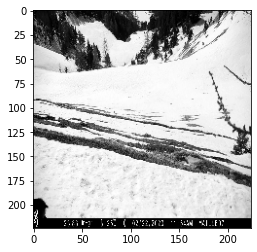

In [ ]:
# show picture
plt.imshow(dataC[59],cmap="gray")
plt.show()

In [ ]:
# absolute difference between each images and their background
t3=[]

for w in range(0,len(dir_sampleC),60):
  for i in range(w,w+59):
    diff = cv2.absdiff(dataC[i],dataC[w+59]) 
    sdiff = np.sum(diff)
    
    t3.append(sdiff)

print(t3)
print(len(t3)) #12 images less, 12 are references/background

[2.7342393771082714, 2.9895963538733117, 3.1456348813982635, 3.2175887604720432, 3.1264999906036746, 3.0567587310816413, 3.2802676209255797, 2.9704027402138222, 3.105849940766041, 3.3322940078086623, 3.3594063179326428, 3.3278385109301962, 3.5431049342655365, 3.7396945282835237, 3.567495581772454, 3.8846941828822423, 3.822107746389195, 3.746740520660315, 3.7786260226844224, 3.8960655016596917, 3.950192645639055, 3.88517577883301, 3.9084376180512184, 3.8021329557620165, 3.8404236023834164, 4.031865413389833, 3.599162240711144, 3.6712635790039623, 3.2643005202638076, 3.3725128342525674, 3.2646776265320074, 3.099728895140755, 2.6603864955152785, 2.476398775865579, 2.4895085425888666, 2.271243335101395, 2.1233426017777086, 2.048169855758045, 2.1239201122268527, 2.0744777205629368, 2.0854489783499344, 1.9756333841286302, 2.297963097061445, 2.030289349530972, 2.2232123727098836, 2.228704837355718, 2.0496652494812757, 2.103349201963691, 1.9465973054357941, 1.8292839505221945, 1.92153094041822

In [ ]:
# difference more than 70% with background
cuts = np.arange(0,len(t3)+1,59) # analysis by step 60
print(cuts)

out = []
indexes = []
for i in range(1,len(cuts)):
  output = ((max(t3[cuts[i-1]:cuts[i]])*70)/100) # 70% of max by step 60
  out.append(output)
  indices = [index for index, value in enumerate(t3[cuts[i-1]:cuts[i]]) if value > output] #index of maximum values
  indexes.append(indices)

print(out)
print(indexes)

[  0  59 118 177 236 295 354 413 472 531 590 649 708]
[2.822305789372883, 2.5426640101760865, 2.4504357598449364, 5.120868729186972, 6.308878537750882, 8.473127899830553, 4.341723218086066, 13.907575123418935, 17.76976123631181, 11.448840188753339, 4.110523453831723, 4.997458473749663]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 30, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 18, 19, 20, 21, 22, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], [0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,

In [ ]:
# find indexes of dir_sample
w2=[]
for w in range(0,len(dir_sampleC),60):
  w=w
  w2.append(w)
print(w2)

indexes2=[]
for i in range(0,12) : 
  nbr=w2[i]
  idx = [x+nbr for x in indexes[i]]
  indexes2.append(idx)

print(indexes2)
print(len(indexes2))

real_index=list(itertools.chain.from_iterable(indexes2)) # concatenate list
print(real_index)

[0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 83, 84, 90, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106], [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137], [180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196], [240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 258, 259, 260, 261, 262, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276], [300, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325], [360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 4

In [ ]:
# select images with animals
dir_animalC = [dir_sampleC[i] for i in real_index] 
print(dir_animalC)

['/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe60.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe90.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe120.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe150.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe180.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe210.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe240.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe270.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe300.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe330.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe360.jpg', '/content/d

 # Test for one night video

In [ ]:
dataN = []

# sort picture
r = re.compile("(\d+)\.jpg$")
dir_sampleN = glob.glob("/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe*.jpg")
dir_sampleN = sorted(dir_sampleN,key=lambda x: int(r.search(x).group(1)))

#remove first picture
dir_sampleN[:] = [x for x in dir_sampleN if "frame0" not in x]

for path in dir_sampleN:
  
  image = cv2.imread(path)

   # convert the images to grayscale
  image = rgb2gray(image)
  
  # resize picture
  image = cv2.resize(image,(224,224))#VGG16/19 (224x224x3RGB)
  
  dataN.append(image)

# scale the raw pixel intensities to the range [0, 1]
dataN = np.array(dataN, dtype="float") / 255.0 

In [ ]:
print(dir_sampleN)
print(len(dir_sampleN))
print(dataN[1])
print(dataN[2].shape)

['/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe30.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe60.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe90.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe120.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe150.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe180.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe210.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe240.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe270.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe300.jpg', '/content/drive/My Dri

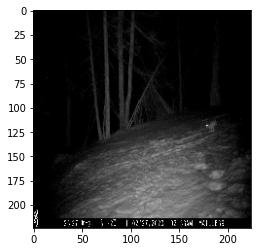

In [ ]:
# show picture
plt.imshow(dataN[0],cmap="gray")
plt.show()

In [ ]:
# calcul of absolute difference of pixel between each images(0 to 38) and the last image(39)
t3=[]

for i in range(39) :
  diff = cv2.absdiff(dataN[i],dataN[39]) 
  sdiff = np.sum(diff)
  
  t3.append(sdiff)
  
print(t3)

[2.078508688545948, 1.921541233369177, 1.8258299391581472, 1.7675626260895305, 1.7147571463647253, 1.6669624068682196, 1.6105456007734649, 1.6206909880616671, 1.6295495328551977, 1.6230463838021094, 1.585735317827045, 1.5860413454817002, 1.576748631062814, 1.5636590593483553, 1.56096525245708, 1.5416100813956422, 1.5269104079535356, 1.5215064695006824, 1.499646407678874, 1.4985246230287659, 1.4873043224302342, 1.4497600407978413, 1.4243537001525437, 1.4209533477081713, 1.4177739096254314, 1.4168345014663006, 1.4035960251312956, 1.40809850054649, 1.4141424047973583, 1.407664607187822, 1.3997951782901197, 1.393118172919142, 1.3840971387950054, 1.3901037961371787, 1.385678645586027, 1.388407304105378, 1.3771965019226695, 1.3887421210536472, 1.370384190559572]


In [ ]:
# According to maximum value, 70% of variation 
a=((np.max(t3))* 70)/100
print(a)

1.4549560819821636


In [ ]:
# select only images with more than 70% of variation of pixel 
indices = [index for index, value in enumerate(t3) if value > a]
print(indices) #position of img
print(len(indices)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
21


In [ ]:
#names of images selected
dir_animalN = [dir_sampleN[i] for i in indices]
print(dir_animalN)

['/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe30.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe60.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe90.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe120.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe150.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe180.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe210.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe240.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe270.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille39_lievre-d_Europe_x1_nuitframe300.jpg', '/content/drive/My Dri

In [ ]:
# export img by jpg
#dir_animalN = [dir_sampleN[i] for i in indices]
#for path in dir_animalN:
#  name_img = path.replace("/content/drive/My Drive/projet_mercantour/picture/","")
#  image = cv2.imread(path)
#  cv2.imwrite("/content/drive/My Drive/projet_mercantour/picture_test/" + name_img, image) 

# For all night video

**sample : 12 night videos split in 41 pictures, total of 492 pictures normally but we have 491 bug for one video**

Problem here number of images by night video are not constant

# For all videos (day, night)

Code which adapt to number of image by video


In [ ]:
# sort picture
r = re.compile("(\d+)\.jpg$")
dir_sample = glob.glob("/content/drive/My Drive/projet_mercantour/picture/*.jpg")
convert = lambda text: int(text) if text.isdigit() else text
alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
dir_sample = sorted(dir_sample,key=alphanum_key)

#remove first pictures "frame0"
dir_sample= [ x for x in dir_sample if "frame0" not in x ]

# split name for counting number of images by video
name=[]
data=[]

for path in dir_sample:

  name_img = os.path.basename(path)
  name_img2=name_img.rsplit('_', 1)[0]
  name.append(name_img2)

  image = cv2.imread(path)

    # convert the images to grayscale
  image = rgb2gray(image)
  
  # resize picture
  image = cv2.resize(image,(224,224))#VGG16/19 (224x224x3RGB)
  
  data.append(image)

# scale the raw pixel intensities to the range [0,1]
data = np.array(data, dtype="float") / 255.0
#number of images by video
img_nbr=[len(list(group)) for key, group in groupby(name)]

In [ ]:
print(dir_sample)
print(name_img)
print(name_img2) 
print(name)
print(data[1])
print(img_nbr) # number of images by video
print(len(img_nbr)) # 24 vidéos
print(len(dir_sample))#1223-24=1199 (we remove first pictures)

['/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe30.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe60.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe90.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe120.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe150.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe180.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe210.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe240.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe270.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe300.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe330.jpg', '/content/dr

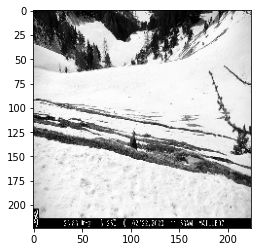

In [ ]:
# show picture
plt.imshow(data[0],cmap="gray")
plt.show()

In [ ]:
# Interval of images
img_split=[0]
n=0
for i in range(0,len(img_nbr)): #0 to 24
  n += img_nbr[i] 
  img_split.append(n)

print(img_split) # 0 to 59 first video, 60 to 119 second video, 120 to 179 third video etc ....
print(len(img_split))

[0, 60, 120, 180, 219, 259, 299, 339, 379, 439, 479, 539, 599, 639, 679, 719, 779, 819, 879, 919, 979, 1039, 1079, 1139, 1199]
25


In [ ]:
# calcul of absolute difference between each images and their background
t3=[]

for z in range(0,len(img_nbr)): # 0 to 24
  for w in range(img_split[z],(img_split[z+1]-1)):
    diff = cv2.absdiff(data[w],data[(img_split[z+1]-1)]) 
    sdiff = np.sum(diff)

    t3.append(sdiff)

print(t3)
print(len(t3)) #1199-24=1175 (24 images allowed to background)
# ATTENTION : Last picture isn't included in our analysis (1199)

[2.7342393771082714, 2.9895963538733117, 3.1456348813982635, 3.2175887604720432, 3.1264999906036746, 3.0567587310816413, 3.2802676209255797, 2.9704027402138222, 3.105849940766041, 3.3322940078086623, 3.3594063179326428, 3.3278385109301962, 3.5431049342655365, 3.7396945282835237, 3.567495581772454, 3.8846941828822423, 3.822107746389195, 3.746740520660315, 3.7786260226844224, 3.8960655016596917, 3.950192645639055, 3.88517577883301, 3.9084376180512184, 3.8021329557620165, 3.8404236023834164, 4.031865413389833, 3.599162240711144, 3.6712635790039623, 3.2643005202638076, 3.3725128342525674, 3.2646776265320074, 3.099728895140755, 2.6603864955152785, 2.476398775865579, 2.4895085425888666, 2.271243335101395, 2.1233426017777086, 2.048169855758045, 2.1239201122268527, 2.0744777205629368, 2.0854489783499344, 1.9756333841286302, 2.297963097061445, 2.030289349530972, 2.2232123727098836, 2.228704837355718, 2.0496652494812757, 2.103349201963691, 1.9465973054357941, 1.8292839505221945, 1.92153094041822

In [ ]:
#remove pictures references
img_nbr2 = [x - 1 for x in img_nbr]
print(img_nbr2)

img_split2=[0]
n2=0
for i in range(0,len(img_nbr2)):
  n2 += img_nbr2[i] 
  img_split2.append(n2)
print(img_split2)
print(len(img_split2))

[59, 59, 59, 38, 39, 39, 39, 39, 59, 39, 59, 59, 39, 39, 39, 59, 39, 59, 39, 59, 59, 39, 59, 59]
[0, 59, 118, 177, 215, 254, 293, 332, 371, 430, 469, 528, 587, 626, 665, 704, 763, 802, 861, 900, 959, 1018, 1057, 1116, 1175]
25


In [ ]:
# Only picture with 70% of variation according to their background are keep
cuts=img_split2

out = []
indexes = []
for i in range(1,len(cuts)):
  output = ((max(t3[cuts[i-1]:(cuts[i])])*70)/100) 
  out.append(output)
  indices = [index for index, value in enumerate(t3[cuts[i-1]:(cuts[i]-1)]) if value > output] #index of maximum values
  indexes.append(indices)

print(out)
print(indexes)

#Notice: miss only the last one, I don't know why ... (number 58 is missing compare to "test for one day video")

[2.822305789372883, 2.5426640101760865, 2.4504357598449364, 1.2817439063361236, 1.4549560819821636, 1.6470371768356293, 1.2211730540194516, 3.1440788041623966, 5.120868729186972, 0.9699432284036142, 6.308878537750882, 8.473127899830553, 1.1700507514502798, 2.3538941791107098, 2.926127189193233, 4.341723218086066, 1.388508957108547, 13.907575123418935, 1.3653612306648808, 17.76976123631181, 11.448840188753339, 1.7629656252334869, 4.110523453831723, 4.997458473749663]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 30, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 29], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 15, 16, 17,

In [ ]:
# find indexes of dir_sample
indexes2=[]
for i in range(0,len(img_nbr)) : 
  nbr=img_split[i]
  idx = [x+nbr for x in indexes[i]]
  indexes2.append(idx)

print(indexes2)
print(len(indexes2))

real_index=list(itertools.chain.from_iterable(indexes2)) # concatenate list
print(real_index)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 83, 84, 90, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106], [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137], [180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 209], [219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239], [259, 260, 261, 262, 263, 264, 265, 266], [299, 300, 301, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329], [339, 340, 341], [379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395], [439, 440, 441, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460], [479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 497, 498, 499, 5

In [ ]:
# select images with animals
dir_animal = [dir_sample[i] for i in real_index] 
print(dir_animal)

['/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe60.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe90.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe120.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe150.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe180.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe210.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe240.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe270.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe300.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe330.jpg', '/content/drive/My Drive/projet_mercantour/picture/maille07_chamois_x1_jourframe360.jpg', '/content/d

In [ ]:
# export img by jpg
#dir_animal = [dir_sample[i] for i in real_index]
#for path in dir_animal:
# name_img = path.replace("/content/drive/My Drive/projet_mercantour/picture/","")
# image = cv2.imread(path)
# cv2.imwrite("/content/drive/My Drive/projet_mercantour/picture2/" + name_img, image)